In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("/content/heart-disease-dataset.csv")
df.head()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   float64
 1   sex                  1190 non-null   float64
 2   chest_pain_type      1190 non-null   float64
 3   resting_bp_s         1190 non-null   float64
 4   cholesterol          1190 non-null   float64
 5   fasting_blood_sugar  1190 non-null   float64
 6   resting_ecg          1190 non-null   float64
 7   max_heart_rate       1190 non-null   float64
 8   exercise_angina      1190 non-null   float64
 9   oldpeak              1190 non-null   float64
 10  st_slope             1190 non-null   float64
 11  target               1190 non-null   float64
dtypes: float64(12)
memory usage: 111.7 KB


In [4]:
df.isnull().sum()

,0
age,0
sex,0
chest_pain_type,0
resting_bp_s,0
cholesterol,0
fasting_blood_sugar,0
resting_ecg,0
max_heart_rate,0
exercise_angina,0
oldpeak,0


In [7]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.drop_duplicates(inplace=True)

In [8]:
df.shape

(918, 12)

In [9]:
df.describe()

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,0.789760,3.251634,132.396514,198.799564,0.233115,0.603486,136.809368,0.404139,0.887364,1.636166,0.553377
std,9.432617,0.407701,0.931031,18.514154,109.384145,0.423046,0.805968,25.460334,0.490992,1.066570,0.609341,0.497414
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,173.250000,0.000000,0.000000,120.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,223.000000,0.000000,0.000000,138.000000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,267.000000,0.000000,1.000000,156.000000,1.000000,1.500000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [10]:
df['target'].value_counts()


,count
target,
1.0,508
0.0,410


In [11]:
df['target'].value_counts(normalize=True)


,proportion
target,
1.0,0.553377
0.0,0.446623


In [12]:
categorical_features = [
    'sex',
    'chest_pain_type',
    'fasting_blood_sugar',
    'resting_ecg',
    'exercise_angina',
    'st_slope'
]

for col in categorical_features:
    print("\n", col)
    print(df[col].value_counts())



 sex
sex
1.0    725
0.0    193
Name: count, dtype: int64

 chest_pain_type
chest_pain_type
4.0    496
3.0    203
2.0    173
1.0     46
Name: count, dtype: int64

 fasting_blood_sugar
fasting_blood_sugar
0.0    704
1.0    214
Name: count, dtype: int64

 resting_ecg
resting_ecg
0.0    552
2.0    188
1.0    178
Name: count, dtype: int64

 exercise_angina
exercise_angina
0.0    547
1.0    371
Name: count, dtype: int64

 st_slope
st_slope
2.0    459
1.0    395
3.0     63
0.0      1
Name: count, dtype: int64


array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'resting_bp_s'}>],
       [<Axes: title={'center': 'cholesterol'}>,
        <Axes: title={'center': 'max_heart_rate'}>],
       [<Axes: title={'center': 'oldpeak'}>, <Axes: >]], dtype=object)

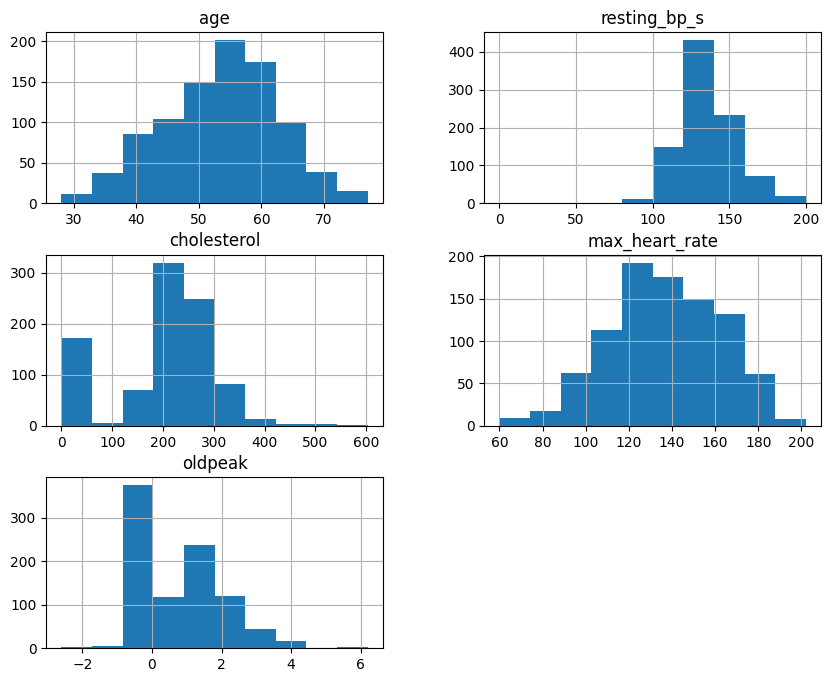

In [15]:
numerical_features = [
    'age',
    'resting_bp_s',
    'cholesterol',
    'max_heart_rate',
    'oldpeak'
]

df[numerical_features].hist(figsize=(10,8))

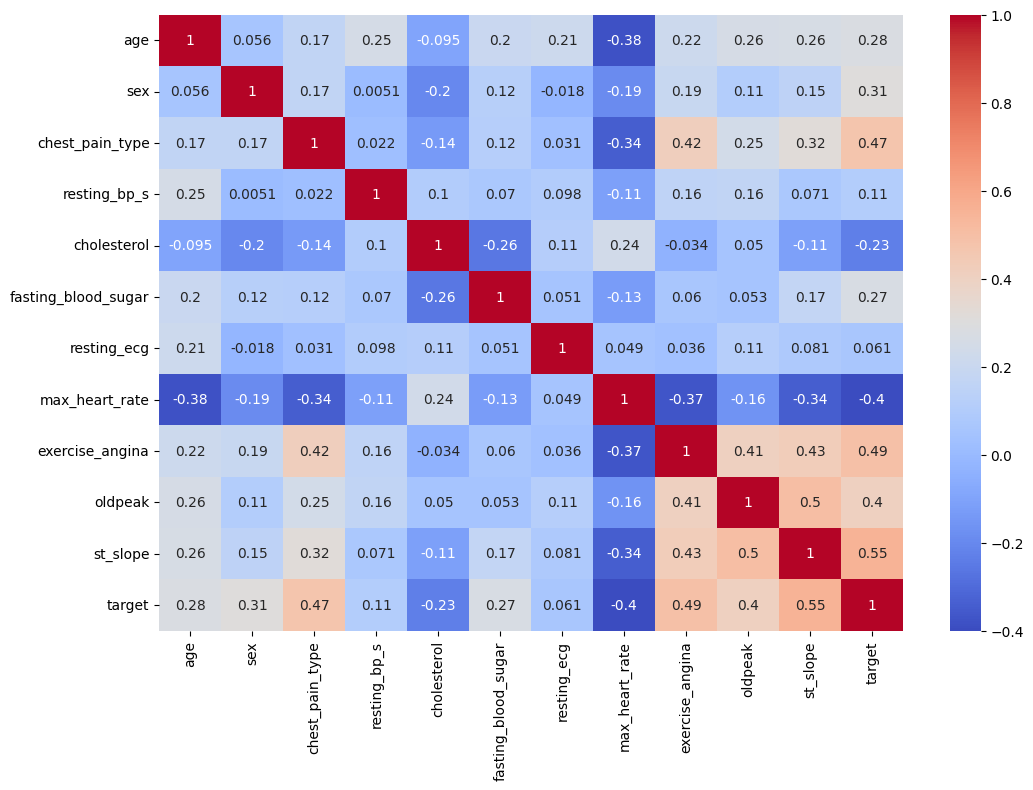

In [16]:

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()


In [20]:
X=df.drop('target',axis=1)
y=df['target']

In [21]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X[numerical_features] = scaler.fit_transform(X[numerical_features])


In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [23]:
X_train

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope
486,1.006537,1.0,2.0,0.356867,0.166481,1.0,1.0,-0.346192,1.0,0.293283,2.0
487,0.157954,1.0,2.0,-1.210356,0.139040,1.0,1.0,1.697314,0.0,-0.457194,1.0
117,0.582246,0.0,4.0,-0.129513,1.273277,1.0,1.0,-0.267596,1.0,0.574711,2.0
362,-0.690629,1.0,4.0,1.491752,-1.818435,0.0,0.0,-0.503385,1.0,-0.832432,2.0
297,-0.372411,1.0,4.0,0.681120,-1.818435,1.0,0.0,0.086088,1.0,-0.175765,2.0
...,...,...,...,...,...,...,...,...,...,...,...
277,-0.266338,1.0,3.0,0.140698,-0.354903,0.0,0.0,0.518368,0.0,1.043759,2.0
202,-0.796702,1.0,3.0,-0.669935,0.285393,0.0,0.0,0.518368,0.0,-0.832432,1.0
463,0.582246,1.0,4.0,-0.561850,0.312834,0.0,0.0,-0.778472,1.0,0.387092,3.0
253,0.794391,1.0,4.0,-0.399724,0.852511,0.0,1.0,-0.857069,1.0,-0.832432,1.0


In [24]:
y_train

,target
486,1.0
487,0.0
117,1.0
362,1.0
297,1.0
...,...
277,1.0
202,0.0
463,1.0
253,0.0


In [25]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_pred=lr.predict(X_test)

In [42]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
lr_accuracy=print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8804347826086957
[[67 15]
 [ 7 95]]
              precision    recall  f1-score   support

         0.0       0.91      0.82      0.86        82
         1.0       0.86      0.93      0.90       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184



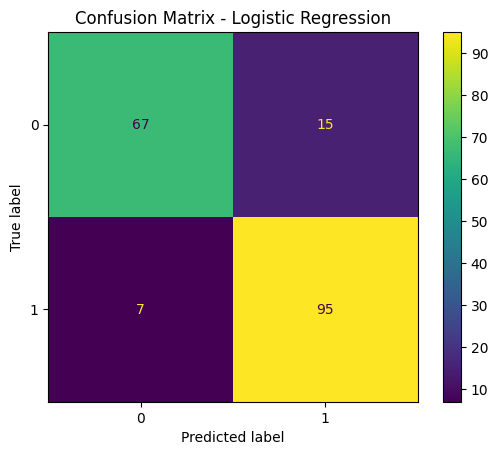

In [27]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title("Confusion Matrix - Logistic Regression")
plt.show()


In [29]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
y_pred1=svc.predict(X_test)

In [45]:
sv_accuracy=print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

0.875
[[67 15]
 [ 8 94]]
              precision    recall  f1-score   support

         0.0       0.89      0.82      0.85        82
         1.0       0.86      0.92      0.89       102

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.87       184
weighted avg       0.88      0.88      0.87       184



In [31]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred2=rf.predict(X_test)

In [46]:
rf_accuracy=print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(classification_report(y_test,y_pred2))

0.8967391304347826
[[71 11]
 [ 8 94]]
              precision    recall  f1-score   support

         0.0       0.90      0.87      0.88        82
         1.0       0.90      0.92      0.91       102

    accuracy                           0.90       184
   macro avg       0.90      0.89      0.90       184
weighted avg       0.90      0.90      0.90       184



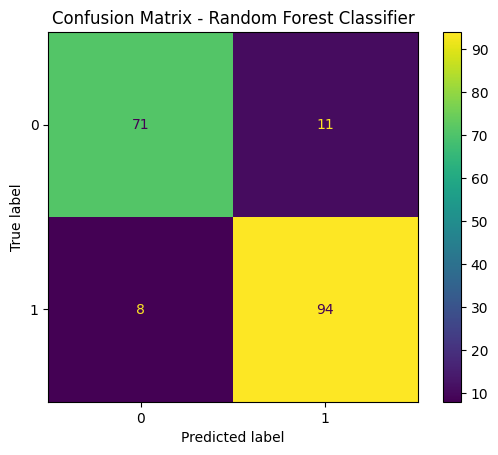

In [33]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm_rf = confusion_matrix(y_test, y_pred2)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp.plot()
plt.title("Confusion Matrix - Random Forest Classifier")
plt.show()


In [47]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42,
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb_model.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [08:46:31] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

In [35]:
y_pred_xgb = xgb_model.predict(X_test)

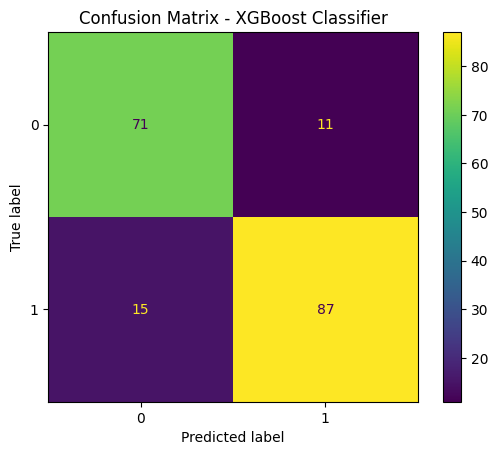

In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


cm_xgb = confusion_matrix(y_test, y_pred_xgb)

disp = ConfusionMatrixDisplay(confusion_matrix=cm_xgb)
disp.plot()
plt.title("Confusion Matrix - XGBoost Classifier")
plt.show()


In [37]:
y_pred_xgb = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print("XGBoost Accuracy:", xgb_accuracy)


XGBoost Accuracy: 0.8586956521739131


In [51]:
import pickle

# Save Random Forest model
with open("rf.pkl", "wb") as f:
    pickle.dump(rf, f)

# Save scaler (we already have it, but ensure saved)
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
